From the power point we have seen that the logistic equation is, 

$$ \hat{y} = \frac{1}{1 + e^{-(mx+b)}} $$

let $z = mx+b $ 

The loss function for logistic regression is

$ L = \sum( -y_i log(\hat{y_i}) - (1 - y_i) log(1 - \hat{y_i}) )$

the update equation for $m$ and $b$ with $\epsilon$ as a learning rate are:

$m = m - \epsilon \frac{\partial L}{\partial m} $

$b = b - \epsilon \frac{\partial L}{\partial b} $

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [48]:
df = pd.read_csv("Titanic.csv")

In [49]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Gender', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [50]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Gender   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [51]:
print(df.shape)

(891, 12)


In [52]:
df["family_size"] = df["SibSp"] + df["Parch"] + 1

In [53]:
print(df["Parch"].head())
print("+++++++++++++")
print(df["SibSp"].head())

0    0
1    0
2    0
3    0
4    0
Name: Parch, dtype: int64
+++++++++++++
0    1
1    1
2    0
3    1
4    0
Name: SibSp, dtype: int64


In [54]:
print(df["family_size"].head())

0    2
1    2
2    1
3    2
4    1
Name: family_size, dtype: int64


In [55]:
print(df["Embarked"].unique())

['S' 'C' 'Q' nan]


In [56]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
family_size      0
dtype: int64


In [57]:
df["Age"].fillna(value=df["Age"].median(), inplace=True)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
family_size      0
dtype: int64

In [58]:
df["Embarked"].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [59]:
df["Embarked"].fillna(value="S", inplace=True)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
family_size      0
dtype: int64

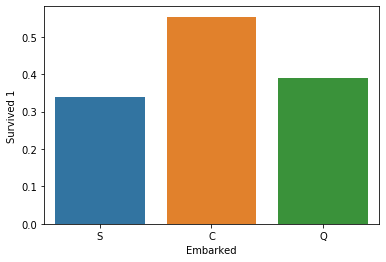

In [60]:
ax = sns.barplot('Embarked', 'Survived', data=df, ci=None)
ax.set(xlabel='Embarked', ylabel='Survived 1')

# 35% of passengers from S survived, 55% of passengers from C survived and 39% of passengers from Q survived

plt.show()

In [61]:
# df["Survived"][df["SibSp"] will return Survived (0 or 1) where the SibSp is 1
print(df["Survived"][df["SibSp"] == 1].value_counts())

1    112
0     97
Name: Survived, dtype: int64


1    112
0     97
Name: Survived, dtype: int64
1    0.535885
0    0.464115
Name: Survived, dtype: float64
Percentage of SibSp = 0 who survived: 34.53947368421053
Percentage of SibSp = 1 who survived: 53.588516746411486
Percentage of SibSp = 2 who survived: 46.42857142857143


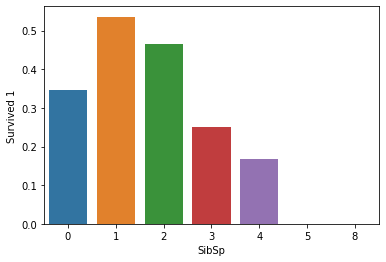

In [62]:
#draw a bar plot for SibSp vs. survival
ax = sns.barplot(x="SibSp", y="Survived", data=df, ci=None)
ax.set(xlabel='SibSp', ylabel='Survived 1')


print(df["Survived"][df["SibSp"] == 1].value_counts())

print(df["Survived"][df["SibSp"] == 1].value_counts(normalize = True))

# df["Survived"][df["SibSp"] == 1].value_counts(normalize = True) two values with indicies 1 and 0
# df["Survived"][df["SibSp"] == 1].value_counts(normalize = True)[1] we are accessing the value corresponding
# to the index 1 which represents Survived 1.

print("Percentage of SibSp = 0 who survived:", df["Survived"][df["SibSp"] == 0].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 1 who survived:", df["Survived"][df["SibSp"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 2 who survived:", df["Survived"][df["SibSp"] == 2].value_counts(normalize = True)[1]*100)

0    374
1    163
Name: Survived, dtype: int64
0    0.696462
1    0.303538
Name: Survived, dtype: float64
1    89
0    72
Name: Survived, dtype: int64
1    0.552795
0    0.447205
Name: Survived, dtype: float64
Percentage of family_size = 1 who survived: 30.353817504655495
Percentage of family_size = 2 who survived: 55.27950310559007
Percentage of family_size = 3 who survived: 57.84313725490197


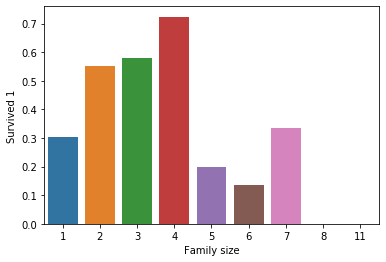

In [63]:
#draw a bar plot for family_size vs. survival

ax = sns.barplot(x="family_size", y="Survived", data=df, ci=None)
ax.set(xlabel='Family size', ylabel='Survived 1')


print(df["Survived"][df["family_size"] == 1].value_counts())
print(df["Survived"][df["family_size"] == 1].value_counts(normalize = True))

print(df["Survived"][df["family_size"] == 2].value_counts())
print(df["Survived"][df["family_size"] == 2].value_counts(normalize = True))
#I won't be printing individual percent values for all of these.
print("Percentage of family_size = 1 who survived:", df["Survived"][df["family_size"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of family_size = 2 who survived:", df["Survived"][df["family_size"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of family_size = 3 who survived:", df["Survived"][df["family_size"] == 3].value_counts(normalize = True)[1]*100)

In [64]:
# converting categorical values to numerical values

from sklearn.preprocessing import LabelEncoder 
labelencoder= LabelEncoder() #initializing an object of class LabelEncoder

In [65]:
df['Em'] = labelencoder.fit_transform(df['Embarked'])

In [66]:
print(df["Em"][0:5])

0    2
1    0
2    2
3    2
4    2
Name: Em, dtype: int32


In [67]:
print(df["Embarked"][0:5])

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object


In [68]:
print(df["Em"].unique())
print(df["Embarked"].unique())

[2 0 1]
['S' 'C' 'Q']


In [69]:
labelencoder.inverse_transform(df['Em'])

array(['S', 'C', 'S', 'S', 'S', 'Q', 'S', 'S', 'S', 'C', 'S', 'S', 'S',
       'S', 'S', 'S', 'Q', 'S', 'S', 'C', 'S', 'S', 'Q', 'S', 'S', 'S',
       'C', 'S', 'Q', 'S', 'C', 'C', 'Q', 'S', 'C', 'S', 'C', 'S', 'S',
       'C', 'S', 'S', 'C', 'C', 'Q', 'S', 'Q', 'Q', 'C', 'S', 'S', 'S',
       'C', 'S', 'C', 'S', 'S', 'C', 'S', 'S', 'C', 'S', 'S', 'S', 'C',
       'C', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'C', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'Q', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'C', 'C', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'Q', 'S', 'C', 'S', 'S', 'C', 'S', 'Q',
       'S', 'C', 'S', 'S', 'S', 'C', 'S', 'S', 'C', 'Q', 'S', 'C', 'S',
       'C', 'S', 'S', 'S', 'S', 'C', 'S', 'S', 'S', 'C', 'C', 'S', 'S',
       'Q', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'C',
       'Q', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'Q', 'S', 'S', 'C', 'S', 'S', 'C', 'S', 'S', 'S

In [70]:
df["Gen"] = labelencoder.fit_transform(df["Gender"])

In [71]:
print(df["Gen"][0:5])
print(df["Gender"][0:5])

print(df["Gen"].unique())
print(df["Gender"].unique())

0    1
1    0
2    0
3    0
4    1
Name: Gen, dtype: int32
0      male
1    female
2    female
3    female
4      male
Name: Gender, dtype: object
[1 0]
['male' 'female']


In [72]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Gender   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  family_size  Em  Gen  
0      0         A/5 21171   7.2500   NaN        S            2   2    1  
1      0          PC 17599  71.2833   C85        C            2   0    0  
2      0  STON/O2. 3101282   7.9250   NaN        S            1   2    0  
3      0            

Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


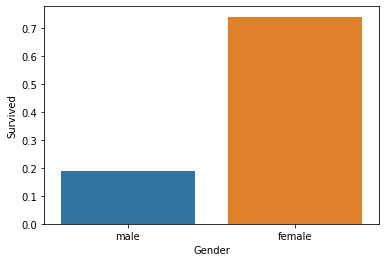

In [73]:
#draw a bar plot of survival by Gender
sns.barplot(x="Gender", y="Survived", data=df, ci=None)

#print percentages of females vs. males that survive
print("Percentage of females who survived:", df["Survived"][df["Gen"] == 0].value_counts(normalize = True)[1]*100)

print("Percentage of males who survived:", df["Survived"][df["Gen"] == 1].value_counts(normalize = True)[1]*100)

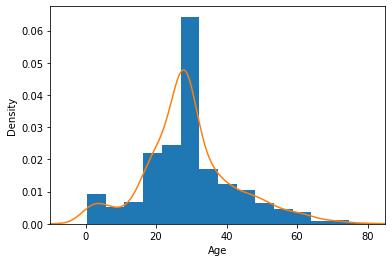

In [74]:
ax = df["Age"].hist(bins=15, density=True, stacked=True)
df["Age"].plot(kind='density')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

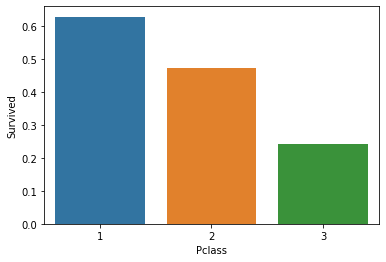

In [75]:
sns.barplot('Pclass', 'Survived', data=df, ci=None)
plt.show()

In [76]:
dfx = df[["Age", "Gen", "family_size", "Em"]].copy(deep=True)
dfy = df[["Survived"]].copy(deep=True)

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

In [78]:
scaler = StandardScaler()
x = scaler.fit_transform(dfx)

In [79]:
# Explanation of Standard Scaler

list1 = np.array([1, 4, 5, 10, 3])

list_mean = np.mean(list1)
list_std = np.std(list1)
print(list_mean)
print(list_std)


#(1-4.6)/3, (4-4.6)/3, (5-4.6)/3, (10-4.6)/3, (3-4.6)/3

newlist = (list1 - list_mean)/list_std
print(newlist)

4.6
3.006659275674582
[-1.19734219 -0.19955703  0.13303802  1.79601328 -0.53215208]


In [80]:
print(x, type(x))

[[-0.56573646  0.73769513  0.05915988  0.58595414]
 [ 0.66386103 -1.35557354  0.05915988 -1.9423032 ]
 [-0.25833709 -1.35557354 -0.56097483  0.58595414]
 ...
 [-0.1046374  -1.35557354  1.29942929  0.58595414]
 [-0.25833709  0.73769513 -0.56097483 -1.9423032 ]
 [ 0.20276197  0.73769513 -0.56097483 -0.67817453]] <class 'numpy.ndarray'>


In [81]:
print(x[0:5])

[[-0.56573646  0.73769513  0.05915988  0.58595414]
 [ 0.66386103 -1.35557354  0.05915988 -1.9423032 ]
 [-0.25833709 -1.35557354 -0.56097483  0.58595414]
 [ 0.4333115  -1.35557354  0.05915988  0.58595414]
 [ 0.4333115   0.73769513 -0.56097483  0.58595414]]


In [102]:
x_train, x_test, y_train, y_test = train_test_split(x, dfy, test_size = 0.2, random_state=42)

In [103]:
print(x_test[0:5])

[[-0.1046374   0.73769513  0.67929458 -1.9423032 ]
 [ 0.12591213  0.73769513 -0.56097483  0.58595414]
 [-0.71943615  0.73769513 -0.56097483  0.58595414]
 [-1.79533395 -1.35557354  0.05915988  0.58595414]
 [-1.18053521 -1.35557354  0.05915988 -1.9423032 ]]


In [104]:
from sklearn.linear_model import LogisticRegression

In [105]:
model = LogisticRegression(penalty='l2', C=1, solver='lbfgs')

In [106]:
print(y_train.shape)
y_train = np.array(y_train).flatten()
print(y_train.shape)

(712, 1)
(712,)


In [107]:
print(x_train[0:5])

[[ 1.24023486  0.73769513 -0.56097483  0.58595414]
 [-0.48888662  0.73769513 -0.56097483  0.58595414]
 [ 0.20276197  0.73769513 -0.56097483  0.58595414]
 [-0.25833709  0.73769513  0.05915988  0.58595414]
 [-1.79533395 -1.35557354  3.15983341  0.58595414]]


In [108]:
model.fit(x_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [109]:
print(x_test.shape)

(179, 4)


In [110]:
ypred = model.predict(x_test)

In [111]:
# to get coefficients and intercepts use the following command
print(model.coef_, model.intercept_)

[[-0.08490232 -1.26446981 -0.29641956 -0.28499185]] [-0.58416838]


#### explanation of the values from the logistic regression model
the independent variables are :"Age", "Gen", "family_size", "Em"

$ mx + b = -0.0849*age -1.2644*gen - 0.2964*fs - 0.28499*em - 0.5841 $

$$\hat{y} = \frac{1}{1+e^{-(mx+b)}}$$

In [116]:
"""
We want to supply a data point and get the probability 
since we are using 4 features which are Age, Gender, Family size and Embarked, 
let's supply 32, 1, 1, 0

Gender: 1:male and 0:female
Emarked: 2:S,  1:Q,  0:C
"""
#import numpy as np
newx1 = pd.DataFrame([[32, 1, 1, 0]])
newx2 = pd.DataFrame([[32, 0, 1, 0]])

sx1 = scaler.transform(newx1)
sx2 = scaler.transform(newx2)
print(sx1)
print(sx2)


prob = model.predict(sx1[0:])
prob2 = model.predict(sx2[0:])
print(prob, prob2)

[[ 0.20276197  0.73769513 -0.56097483 -1.9423032 ]]
[[ 0.20276197 -1.35557354 -0.56097483 -1.9423032 ]]
[0] [1]


#### Confusion Matrix

Is a table that gives a visual representation of performance of a classification. Each row in the table represents the instances in an actual class and each column represents the instances in a predicted class. Rows and columns can be interchanged.  

<img src ="confusion_matrix.png" width = 300, height = 200>

#### False Positive is known as Type I error and False Negative is known as Type II error. 

Let's consider another matrix and compute come metrics

<img src ="confusion_matrix2.png" width = 500, height = 400>

Important metrics

Recall = Sensitivity = True Positive rate = $\frac{TP}{TP+FN}$ 

Precision = Positive Predictive Value = $\frac{TP}{TP+FP} $  

Accuracy = $ \frac{TP+TN}{TP+TN+FP+FN} $

Specificity = True Negative rate = $ \frac{TN}{FP+TN} $ 

False Positive Rate = $\frac{FP}{FP+TN} $  = 1 - TNR = 1 - Specificity  

F1 score is an harmonic mean of Recall and Precision, 
F1 = $\frac{2*Precision*Recall}{Precision+Recall} $



Receiver Operating Characteristic curve, ROC curve is computed by plotting the True Positive Rate (TPR) with False Positive Rate (FPR) for different thresholds. 

<img src ="ROC_curves.svg" width = 400, height = 300>


Area Under the Receciver Operating Characteristic Curve, AUCROC, measures the separability of classes. Area close to 1 means the classes are properly classified. AUC under 0.5 means the classification is not good. 

Images courtesy of Wiki

In [117]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, ypred)

array([[88, 17],
       [23, 51]], dtype=int64)

In [118]:
from sklearn.metrics import accuracy_score
print("Base rate accuracy is: %0.2f" %(accuracy_score(y_test, ypred)))

Base rate accuracy is: 0.78


In [119]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [120]:
logit_roc_auc = roc_auc_score(y_test, ypred)
print("Logistic AUC = %0.2f" %logit_roc_auc)
print(classification_report(y_test, ypred))

Logistic AUC = 0.76
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       105
           1       0.75      0.69      0.72        74

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.77       179
weighted avg       0.78      0.78      0.77       179



In [121]:
from sklearn.metrics import roc_curve
b = model.predict_proba(x_test)[:,1]
print(b[0:5])
fpr, tpr, threshold = roc_curve(y_test, b)

[0.2394143  0.17823375 0.18898973 0.74985013 0.85397799]


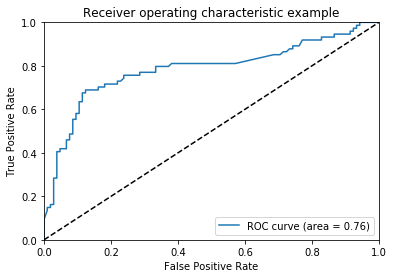

In [122]:
# plotting ROC curve
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' %logit_roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
"""
In-class activity: Include Fare feature and fit a logistic regression. 
Calculate precision, recall and F1-score. Then plot ROC curve.
"""

In [123]:
dfx = df[["Age", "Gen", "family_size", "Em", "Fare"]].copy(deep=True)
dfy = df[["Survived"]].copy(deep=True)

In [124]:
x = scaler.fit_transform(dfx)

In [125]:
x_train, x_test, y_train, y_test = train_test_split(x, dfy, test_size = 0.2, random_state=42)

model = LogisticRegression(penalty='l2', C=1, solver='lbfgs')

y_train = np.array(y_train).flatten()

model.fit(x_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [126]:
ypred = model.predict(x_test)
confusion_matrix(y_test, ypred)
print("Base rate accuracy is: %0.2f" %(accuracy_score(y_test, ypred)))
logit_roc_auc = roc_auc_score(y_test, ypred)
print("Logistic AUC = %0.2f" %logit_roc_auc)
print(classification_report(y_test, ypred))


Base rate accuracy is: 0.79
Logistic AUC = 0.77
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       105
           1       0.77      0.69      0.73        74

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.78       179
weighted avg       0.79      0.79      0.79       179



In [127]:
print(confusion_matrix(y_test, ypred))

[[90 15]
 [23 51]]


In [ ]:
# Can try a model with pclass instead of fare